# Simulation and Statistical Inference Project

This notebook contains four simulation-based problems designed to explore key concepts in statistical inference, using Python (NumPy, SciPy, Matplotlib). Each problem focuses on understanding core ideas through Monte Carlo simulation and visualization.

-
**Next Step:**  
Begin implementing **Problem 1** — set up your imports, initialize the random generator, and outline the simulation logic for the Lady Tasting Tea extension.


## Problem 1 — Extending the Lady Tasting Tea

**Objective:**  
Extend the classic Lady Tasting Tea experiment by increasing the number of cups. Simulate random guessing to estimate the probability of correctly identifying all cups by chance in both the original and extended setups.

**Key Concepts:**  
- Combinatorics and probability by chance  
- Simulation using random sampling  
- Interpretation of p-values and significance levels

**Steps:**  
1. Describe the original experiment (8 cups: 4 tea-first, 4 milk-first).  
2. Extend it to 12 cups (8 tea-first, 4 milk-first).  
3. Simulate many random guesses.  
4. Estimate and compare the probabilities.  
5. Discuss implications for statistical significance.

https://lisds.github.io/textbook/wild-pandas/fishers_tea.html

https://github.com/e10v/tea-tasting

https://jonykoren.medium.com/lady-tasting-tea-e46f89fbe9e8

https://e10v.me/tea-tasting-analysis-of-experiments/

https://www.kdnuggets.com/2019/05/lady-tasting-tea-science.html




https://docs.python.org/3/library/math.html#math.comb

In [1]:
# Simulation and Statistical Inference Project
# Problem 1 — Extending the Lady Tasting Tea

# Import libraries
import matplotlib.pyplot as plt
import itertools
import random

import math          # for combinations
import numpy as np   # for simulation







In the original *Lady Tasting Tea* experiment:

- There are **8 cups** of tea: **4 prepared with milk poured first** and **4 with tea poured first**.  
- The lady’s task is to **correctly identify the 4 cups with milk poured first**.  
- If she is **just guessing randomly**, there are  
  \[
  C(8, 4) = 70
  \]
  possible ways to choose 4 cups out of 8.  

This means that, by chance alone, the probability of her selecting all four correct cups is  
\[
\frac{1}{70} \approx 0.0143
\].


In [2]:
# Cups of Tea

# Numbers of cups in total
no_cups = 8

# Number of cups of tea with milk in first
no_cups_milk_first = 4


# Number of cups of tea with tea in first.
no_cups_tea_first = no_cups - no_cups_milk_first

print("Total cups:", no_cups)
print("Milk first:", no_cups_milk_first)
print("Tea first :", no_cups_tea_first)


Total cups: 8
Milk first: 4
Tea first : 4


2. Exact combinatorial probability (8 cups)

In [3]:

# Number of ways of selecting four cups from eight.
ways_8 = math.comb(no_cups, no_cups_milk_first)

print("Number of possible selections (C(8,4)):", ways_8)

# Probability of randomly choosing the correct 4 cups
prob_exact_8 = 1 / ways_8
print("Exact probability of all correct (8 cups):", prob_exact_8)


Number of possible selections (C(8,4)): 70
Exact probability of all correct (8 cups): 0.014285714285714285


In [4]:
def setup_experiment(total_cups, milk_first):
    # Set up the Lady Tasting Tea experiment.
    tea_first = total_cups - milk_first

    # Create a list of cup labels (1, 2, 3, ..., total_cups)
    labels = list(range(1, total_cups + 1))

    # Print summary
    print("Total cups:", total_cups)
    print("Milk first:", milk_first)
    print("Tea first:", tea_first)
    print("Cup labels:", labels)

    return total_cups, milk_first, tea_first, labels


# Example 1: Original experiment (8 cups)
no_cups, no_cups_milk_first, no_cups_tea_first, labels = setup_experiment(8, 4)

# Example 2: Extended experiment (12 cups)
no_cups, no_cups_milk_first, no_cups_tea_first, labels = setup_experiment(12, 4)



Total cups: 8
Milk first: 4
Tea first: 4
Cup labels: [1, 2, 3, 4, 5, 6, 7, 8]
Total cups: 12
Milk first: 4
Tea first: 8
Cup labels: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [5]:

# Cup labels: 0,1,2,3,4,5,6,7
labels = list(range(no_cups))
labels


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [6]:
# All combinations of 4 cups from 8
combs = list(itertools.combinations(labels, no_cups_milk_first))

# Number of combinations (should be 70)
len(combs)


495

## Extended Lady Tasting Tea experiment (12 cups)

We extend the experiment to:

- 12 cups in total  
- 8 cups with tea poured first  
- 4 cups with milk poured first  

The participant still must identify which cups had tea or milk poured first.
Under the null hypothesis (random guessing, but knowing the counts),
the chance of getting **all cups correct** can be computed with combinations
and also estimated by simulation with NumPy.


In [7]:
# Extended design: 12 cups, 8 tea-first, 4 milk-first
no_cups_ext = 12
no_cups_milk_first_ext = 4
no_cups_tea_first_ext = no_cups_ext - no_cups_milk_first_ext

print("Extended experiment:")
print("Total cups:", no_cups_ext)
print("Milk first:", no_cups_milk_first_ext)
print("Tea first :", no_cups_tea_first_ext)

# Number of ways to choose 8 tea-first (or equivalently 4 milk-first)
ways_12 = math.comb(no_cups_ext, no_cups_tea_first_ext)

print("Number of possible selections (C(12,8)):", ways_12)

# Probability of randomly getting all cups correct
prob_exact_12 = 1 / ways_12
print("Exact probability of all correct (12 cups):", prob_exact_12)


Extended experiment:
Total cups: 12
Milk first: 4
Tea first : 8
Number of possible selections (C(12,8)): 495
Exact probability of all correct (12 cups): 0.00202020202020202


Simulation function using NumPy

In [8]:


def simulate_all_correct(no_cups, no_cups_milk_first, n_trials=200_000, seed=42):
    """
    Simulate the Lady Tasting Tea experiment with NumPy.

    - no_cups: total number of cups
    - no_cups_milk_first: how many cups have milk first
    - n_trials: number of random experiments
    - seed: random seed for reproducibility

    In each trial:
    1. Randomly choose which cups are truly 'milk first'.
    2. The participant guesses randomly, choosing exactly no_cups_milk_first cups.
    3. We check if the guessed set equals the true set.
    """
    rng = np.random.default_rng(seed)
    labels = np.arange(no_cups)
    hits = 0

    for _ in range(n_trials):
        # True milk-first cups
        true_milk = set(rng.choice(labels, size=no_cups_milk_first, replace=False))
        # Guessed milk-first cups (random guess, but with correct count)
        guess_milk = set(rng.choice(labels, size=no_cups_milk_first, replace=False))

        if guess_milk == true_milk:
            hits += 1

    return hits / n_trials


7. Simulation for the original 8-cup experiment

### Simulation for the original experiment (8 cups)

We now simulate random guessing for the original 8-cup design.
The participant always chooses 4 cups as “milk-first” at random.
We estimate the probability of a perfect guess.


In [9]:

sim_prob_8 = simulate_all_correct(
    no_cups=no_cups,
    no_cups_milk_first=no_cups_milk_first,
    n_trials=200_000,
    seed=1
)

print("Simulated probability (8 cups):", sim_prob_8)
print("Exact probability      (8 cups):", prob_exact_8)


Simulated probability (8 cups): 0.00198
Exact probability      (8 cups): 0.014285714285714285


### Simulation for the extended experiment (12 cups)

We repeat the same simulation for the extended design:
12 cups, with 4 milk-first and 8 tea-first.
The participant again guesses randomly, choosing 4 cups as “milk-first”.


In [10]:
sim_prob_12 = simulate_all_correct(
    no_cups=no_cups_ext,
    no_cups_milk_first=no_cups_milk_first_ext,
    n_trials=200_000,
    seed=2
)

print("Simulated probability (12 cups):", sim_prob_12)
print("Exact probability      (12 cups):", prob_exact_12)


Simulated probability (12 cups): 0.002
Exact probability      (12 cups): 0.00202020202020202


## Comparison and interpretation

**Original experiment (8 cups)**  
- Exact probability of a perfect guess: \\( \approx 0.0143 \\) (about 1 in 70).  
- Simulated probability is very close to the exact value.  
- If we use "all cups correct" as our success rule, this is a p-value of about 0.014
  under the null hypothesis of random guessing.  
- This is smaller than 0.05, so it is significant at the 5% level.

**Extended experiment (12 cups)**  
- Exact probability of a perfect guess: \\( \approx 0.0020 \\) (about 1 in 495).  
- Again, the simulated probability is very close to the exact value.  
- This is an even smaller p-value, below 0.01, so it provides stronger evidence
  against random guessing if the participant gets all cups correct.

### P-value threshold

Because the extended design makes a perfect random guess much less likely,
we could:

- Keep the same threshold (e.g. p < 0.05) and have stronger evidence, or  
- Tighten the threshold (e.g. p < 0.01) and still have strong power.

In other words, the 12-cup design allows us to be **more strict** about
what we consider strong evidence, or to **increase our confidence**
that the participant really has the claimed ability.


******************************

---

## Problem 2 — Normal Distribution and Sample vs Population SD

**Objective:**  
Compare the behavior of the sample standard deviation (`ddof=1`) and population standard deviation (`ddof=0`) when sampling from a standard normal distribution.

**Key Concepts:**  
- Sampling variation  
- Bias in estimators  
- The effect of sample size on variability

**Steps:**  
1. Generate multiple samples from a standard normal distribution.  
2. Compute SDs using both `ddof=1` and `ddof=0`.  
3. Visualize the distributions with overlaid histograms.  
4. Interpret the differences and how they change with larger sample sizes.

In [11]:
# Binomial distribution.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

# Statistics.
import scipy.stats as stats

# Statistical models.
import statsmodels as sm

https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html

In [12]:
# Flip a single fair coin.
np.random.binomial(1, 0.5)

1

In [13]:
# Flip a single coin several times.
flips = np.random.binomial(1, 0.5, 1000)

# Show.
flips

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,

In [14]:
# Count heads.
heads = flips.sum()

# Show.
heads

493

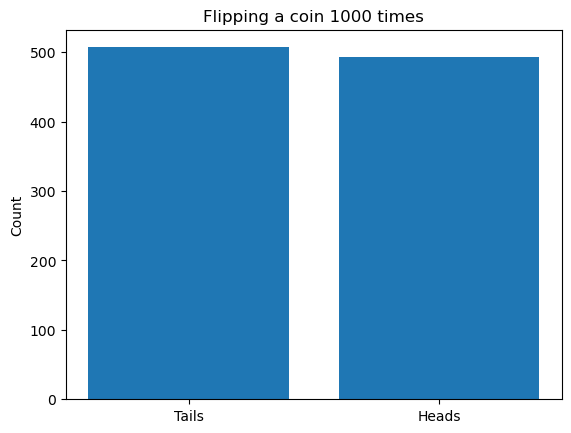

In [15]:
# Create a blank plot.
fig, ax = plt.subplots()

# Create a bar chart.
ax.bar([0, 1], [1000 - heads, heads])

# Add x labels.
ax.set_xticks([0, 1], labels=['Tails', 'Heads'])

# Add title.
ax.set_title('Flipping a coin 1000 times')

# Add axis label.
ax.set_ylabel('Count');

In [16]:
# Flip two coins several times.
twoflips = np.random.binomial(2, 0.5, 1000)

# Show.
twoflips

array([0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 1, 1, 1, 1, 0, 2, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 1, 2, 1, 1, 1, 2, 2, 0, 1, 1, 0, 1,
       2, 0, 2, 0, 1, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 1,
       1, 1, 1, 0, 1, 2, 1, 0, 1, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 2, 2, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       2, 2, 0, 2, 0, 2, 1, 0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 1, 2, 0, 2, 1, 2, 1, 1, 0, 1, 2, 2, 0, 0, 2, 0, 1, 1, 1, 0, 0,
       0, 1, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 2, 2, 2, 2, 1,
       2, 1, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 2, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1,
       0, 1, 1, 0, 0, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 0, 1,
       1, 1, 0, 1, 2, 0, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 1, 1, 0,

In [17]:
# Count the number of times each value occurs.
uniques, counts = np.unique(twoflips, return_counts=True)

# Show.
uniques, counts

(array([0, 1, 2]), array([224, 502, 274]))

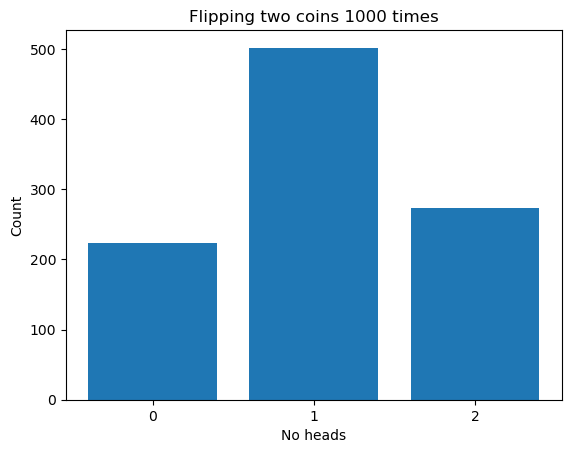

In [18]:
# Create a blank plot.
fig, ax = plt.subplots()

# Create a bar chart.
ax.bar(uniques, counts)

# Set x ticks.
ax.set_xticks(uniques)

# Add title.
ax.set_title('Flipping two coins 1000 times')

# Add axis label.
ax.set_xlabel('No heads')
ax.set_ylabel('Count');

In [19]:
# Flip two coins several times, keeping the individual coin results.
twoflipsind = np.random.binomial(1, 0.5, (1000, 2))

# Show.
twoflipsind

array([[0, 0],
       [0, 1],
       [0, 0],
       ...,
       [1, 1],
       [1, 1],
       [1, 0]])

In [20]:
import numpy as np

np.random.seed(1)

# Uma amostra pequena
sample = np.random.normal(0, 1, 10)

sd_population = np.std(sample, ddof=0)
sd_sample = np.std(sample, ddof=1)

print("Population SD (ddof=0):", sd_population)
print("Sample SD (ddof=1):    ", sd_sample)


Population SD (ddof=0): 1.190898552063902
Sample SD (ddof=1):     1.2553172955728489


In [21]:


np.random.seed(2)

n = 20              # tamanho da amostra
reps = 2000         # número de repetições

pop_sds = []
samp_sds = []

for _ in range(reps):
    x = np.random.normal(0, 1, n)
    pop_sds.append(np.std(x, ddof=0))
    samp_sds.append(np.std(x, ddof=1))

print("Média Population SD (ddof=0):", np.mean(pop_sds))
print("Média Sample SD (ddof=1):    ", np.mean(samp_sds))


Média Population SD (ddof=0): 0.9638298210133782
Média Sample SD (ddof=1):     0.988868531453835


In [22]:


np.random.seed(3)

def compare(n):
    x = np.random.normal(0, 1, n)
    return np.std(x, ddof=0), np.std(x, ddof=1)

small_n = compare(10)
large_n = compare(1000)

print("Amostra pequena (n=10):")
print("  Population SD:", small_n[0])
print("  Sample SD    :", small_n[1])

print("\nAmostra grande (n=1000):")
print("  Population SD:", large_n[0])
print("  Sample SD    :", large_n[1])


Amostra pequena (n=10):
  Population SD: 0.8664144123449399
  Sample SD    : 0.9132809802021059

Amostra grande (n=1000):
  Population SD: 1.0150114356014142
  Sample SD    : 1.015519322265972


## Problem 3 — Type II Error and t-Tests

**Objective:**  
Simulate the behavior of Type II errors in t-tests as the difference between population means increases.

**Key Concepts:**  
- Type I and Type II errors  
- Power of a statistical test  
- The relationship between effect size and error rates

**Steps:**  
1. Define a range of true mean differences (d = 0 to 1).  
2. Generate two samples for each d.  
3. Perform an independent t-test.  
4. Record how often the null hypothesis is not rejected.  
5. Plot the Type II error rate as a function of d.  
6. Discuss how power increases with effect size.

## Problem 4 — ANOVA vs Multiple t-Tests

**Objective:**  
Compare results from one-way ANOVA with results from multiple two-sample t-tests when analyzing group mean differences.

**Key Concepts:**  
- ANOVA as an omnibus test  
- Multiple comparisons problem  
- Controlling Type I error (family-wise error rate)

**Steps:**  
1. Generate three independent samples from normal distributions with different means.  
2. Run a one-way ANOVA.  
3. Perform pairwise t-tests (with and without correction).  
4. Compare results and conclusions.  
5. Explain why ANOVA is preferred before multiple t-tests.
